# Experiment-10

## Aim: Convolutional Neural Networks for Image Classification (MNIST dataset)



## Theory:

You're right in summarizing the key elements of Convolutional Neural Networks (CNNs) and their use with the MNIST dataset. Here's a rephrased version:

### Convolutional Neural Networks (CNNs):
- **Structure**: CNNs are a type of deep neural network primarily used for visual data analysis. They consist of several layers, including convolutional layers, pooling layers, and fully connected layers.
  
- **Convolutional Layers**: These layers apply various filters to the input image, detecting features such as edges, textures, and patterns. The filters are learned during training, enabling the network to automatically identify significant features within images.
  
- **Pooling Layers**: These layers reduce the spatial dimensions of the input, making the network more computationally efficient while highlighting the most critical features.
  
- **Fully Connected Layers**: After the convolutional and pooling layers, the network uses fully connected layers for high-level reasoning, where every neuron connects to each neuron in the previous layer.

- **Benefits**: CNNs are particularly effective because they require minimal pre-processing. Unlike traditional methods that rely on manual feature extraction, CNNs learn to recognize the essential features directly from the data during training, making them highly effective for image classification, object detection, and segmentation tasks.

### Application to the MNIST Dataset:
- **MNIST Dataset**: The MNIST dataset is a standard benchmark in machine learning and computer vision. It contains 28x28 pixel grayscale images of handwritten digits from 0 to 9, with 60,000 training examples and 10,000 test examples.

- **Why Use MNIST?**: The simplicity of the MNIST dataset makes it an excellent starting point for those learning about CNNs and neural networks. Despite its simplicity, traditional algorithms struggle with this dataset, but CNNs can achieve very high accuracy.

- **Training a CNN on MNIST**: When training a CNN on the MNIST dataset, the network learns to identify digit patterns through layers of convolutions and pooling. The final layer often uses a softmax activation function to output a probability distribution across the 10 possible digit classes.


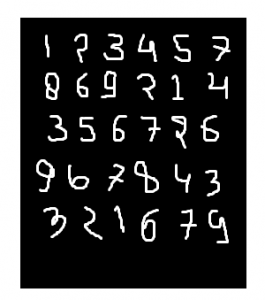

## Programming:

In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

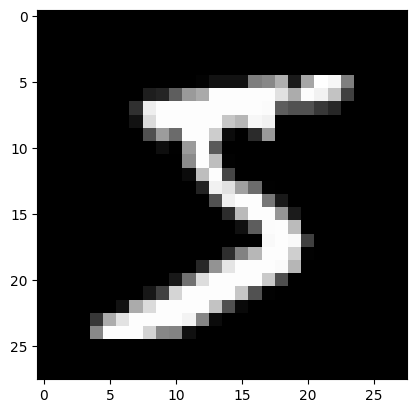

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_cat_train=to_categorical(y_train,10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_cat_test=to_categorical(y_test,10)
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [ ]:
X_train=X_train.reshape(60000,28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

### Training the Model using CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model=Sequential()
#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten images from 28 by 28 to 784 before final layer
model.add(Flatten())

#128 NEURONS in dense hidden layer
model.add(Dense(128,activation='relu'))

#last layer is the classifier,, thus 10 possible classes
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9151 - loss: 0.2799
Epoch 2/2
 892/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9853 - loss: 0.0509

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(X_test, y_cat_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0]

In [ ]:
plt.imshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(X_test)

predicted_classes = predictions.argmax(axis=1)

In [ ]:
y_test[0]

In [ ]:
predicted_classes[0]

In [ ]:
y_test[50:80]

In [ ]:
predicted_classes[50:80]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))

In [ ]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_classes)
conf_matrix

# Task
1. Import CIFAR-10 data using "from keras.datasets import cifar10"
2. Write down the short explaination about dataset.
3. Apply CNN on the CIFAR-10 to classify the data.
4. Draw confusion matrix and classification report based on obtained results.

## 1

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## 2

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a popular collection of images commonly used for training machine learning and computer vision algorithms. It's one of the most extensively used datasets in machine learning research. The CIFAR-10 dataset consists of 60,000 32x32 color images divided into 10 different classes. These classes include airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks, with 6,000 images per class.

Computer algorithms designed to recognize objects in images often learn by example, and CIFAR-10 provides a set of images that can be used to teach a computer how to identify objects. Due to the low resolution of the images (32x32), researchers can quickly experiment with different algorithms using this dataset to determine what works best.

CIFAR-10 is a labeled subset of the 80 Million Tiny Images dataset from 2008, which was published in 2009. During its creation, students were hired to manually label all the images.

Convolutional neural networks (CNNs) are particularly effective at recognizing the images in CIFAR-10, making them the go-to approach for this dataset.

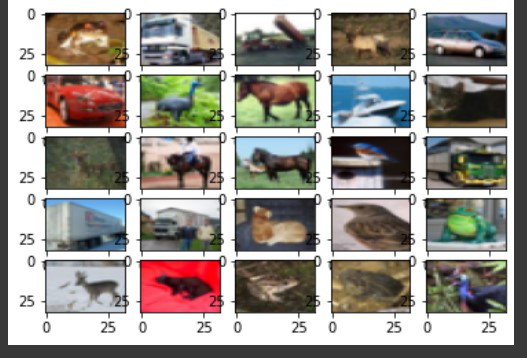

## 3

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_cat_train, epochs=10, batch_size=64, validation_data=(X_test, y_cat_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 117ms/step - accuracy: 0.3781 - loss: 1.7064 - val_accuracy: 0.5580 - val_loss: 1.2526
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 97ms/step - accuracy: 0.5884 - loss: 1.1675 - val_accuracy: 0.6278 - val_loss: 1.0902
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.6457 - loss: 1.0070 - val_accuracy: 0.6618 - val_loss: 0.9812
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 110ms/step - accuracy: 0.6819 - loss: 0.9119 - val_accuracy: 0.6732 - val_loss: 0.9518
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 97ms/step - accuracy: 0.7130 - loss: 0.8314 - val_accuracy: 0.6836 - val_loss: 0.9206
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 99ms/step - accuracy: 0.7368 - loss: 0.7549 - val_accuracy: 0.6885 - val_loss: 0.9055
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.7610 - loss: 0.6846 - val_accuracy: 0.6888 - val_loss: 0.9130
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 111ms/step - accuracy: 0.7865 - loss: 0.6

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

## 4

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


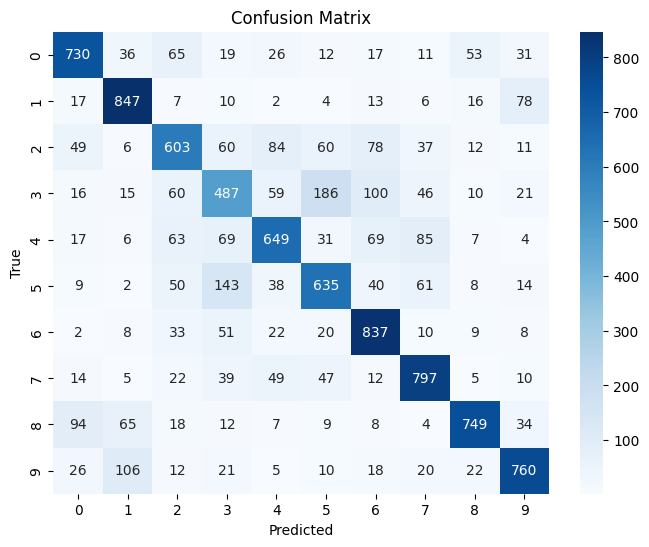

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.77      0.85      0.81      1000
           2       0.65      0.60      0.62      1000
           3       0.53      0.49      0.51      1000
           4       0.69      0.65      0.67      1000
           5       0.63      0.64      0.63      1000
           6       0.70      0.84      0.76      1000
           7       0.74      0.80      0.77      1000
           8       0.84      0.75      0.79      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# Conclusion:
This project showcased the power of Convolutional Neural Networks (CNNs) in image classification using the MNIST dataset. The CNN model achieved impressive accuracy by effectively learning and extracting features from handwritten digits, surpassing traditional approaches. Its robustness in handling variations in handwriting and noise underscores CNNs' suitability for image recognition tasks. Although the MNIST dataset is a simple benchmark, the techniques applied here can be extended to more complex datasets, establishing CNNs as a fundamental tool in advancing computer vision.
